# IMPORTING LIBRARY

In [1]:
import pandas as pd # read csv
import re # detect username, url, html entity
import string
import nltk
from nltk.corpus import stopwords # remove stopwords
from sklearn.feature_extraction.text import CountVectorizer # convert text data to token count
from sklearn.model_selection import train_test_split # split dataset into training and test
from sklearn.tree import DecisionTreeClassifier # build model
from sklearn.metrics import confusion_matrix # for matrix output
from sklearn.metrics import accuracy_score # check accuracy score

# for graphical representation of test output
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# READ THE DATA

In [2]:
data = pd.read_csv("twitter.csv")
data.isnull().sum()/data.shape[0] * 100
data['labels'] = data['class'].map({0:"Hate Speech",
                                    1:"Offensive Language",
                                    2:"No Hate or Offensive Language"})
data = data[['tweet', 'class', 'labels']]

# FUNCTION TO CLEAN THE DATA

In [3]:
stop_words = set(stopwords.words('english'))
# add rt to remove retweet in dataset (noise)
stop_words.add('rt')

stemmer = nltk.SnowballStemmer('english')

# remove new lines
def remove_new_lines(raw_text):
    regex = r"\n"
    text = re.sub(regex, "", raw_text)
    return text

# remove punctuations
def remove_punctuations(raw_text):
    pun_regex = r"[%s]"%re.escape(string.punctuation)
    text = re.sub(pun_regex, "", raw_text)
    return text

# remove html entity:
def remove_entity(raw_text):
    entity_regex = r"&[^\s;]+;"
    text = re.sub(entity_regex, "", raw_text)
    return text

# change the user tags
def change_user(raw_text):
    regex = r"@([^ ]+)"
    text = re.sub(regex, "user", raw_text)

    return text

# remove urls
def remove_url(raw_text):
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(url_regex, '', raw_text)

    return text

# remove unnecessary symbols
def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')

    return text

# remove stopwords
def remove_stopwords(raw_text):
    text = [word for word in raw_text.split(' ')]
    text = " ".join(text)
    return text

## this function in to clean all the dataset by utilizing all the function above
def preprocess(datas):
    clean = []
    # change the @xxx into "user"
    clean = [change_user(text) for text in datas]
    # remove emojis (specifically unicode emojis)
    clean = [remove_entity(text) for text in clean]
    # remove new lines
    clean = [remove_new_lines(text) for text in clean]
    #remove_punctuations
    clean = [remove_punctuations(text) for text in clean]
    # remove urls
    clean = [remove_url(text) for text in clean]
    # remove trailing stuff
    clean = [remove_noise_symbols(text) for text in clean]
    # remove stopwords
    clean = [remove_stopwords(text) for text in clean]
    return clean

In [4]:
data['tweet'] = preprocess(data['tweet'])

# SPLITTING THE DATASET INTO TEST AND VALIDATION

In [5]:
x, y = data['tweet'], data['labels']

# to convert tweet(text documents) into a matrix of token counts
cv = CountVectorizer()
x = cv.fit_transform(x)

# function to split dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

print(f"num test tweet: {y_test.shape[0]}")
print(f"num train tweet: {y_train.shape[0]}")

num test tweet: 8675
num train tweet: 16108


# Building the model

In [6]:
# to train a decision tree model on training data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# Conclusion Matrix and accuracy

In [7]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test, y_pred)

0.8803458213256484

# Graphical Representation of test data

<Axes: >

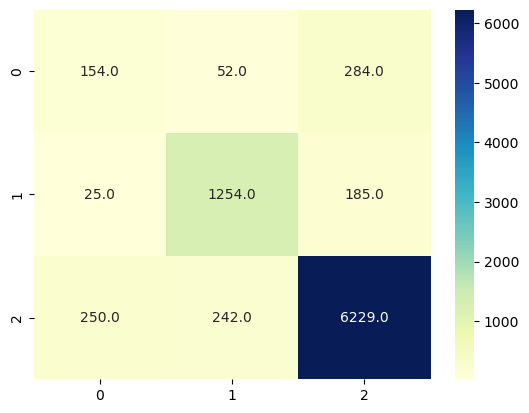

In [8]:
sns.heatmap(cm, annot=True, fmt='.1f', cmap='YlGnBu')

# Test RUN

In [23]:
test = ["Shut UP",
        "Bitch",
        "Let's unite and kill all the people who are protesting against the government",
        "Do your Work Properly",
        "You are a coward",
        "I love you",
        "@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer gaywad",
        "@CB_Baby24: @white_thunduh alsarabsss hes a beaner smh you can tell hes a mexican",
        "@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn",
        "@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR This is why there's black people and niggers",
        """@NoChillPaz: At least I'm not a nigger http://t.co/RGJa7CfoiT

        Lmfao""",
        "@NotoriousBM95: @_WhitePonyJr_ Ariza is a snake and a coward but at least he isn't a cripple like your hero Roach lmaoo"
        ]
test = preprocess(test)
data1 = cv.transform(test).toarray()
dt.predict(data1)

array(['Offensive Language', 'Offensive Language', 'Offensive Language',
       'No Hate or Offensive Language', 'No Hate or Offensive Language',
       'No Hate or Offensive Language', 'Hate Speech', 'Hate Speech',
       'Hate Speech', 'Hate Speech', 'Offensive Language', 'Hate Speech'],
      dtype=object)